In [45]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from skimpy import skim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv("data.txt", sep=",")

<Axes: >

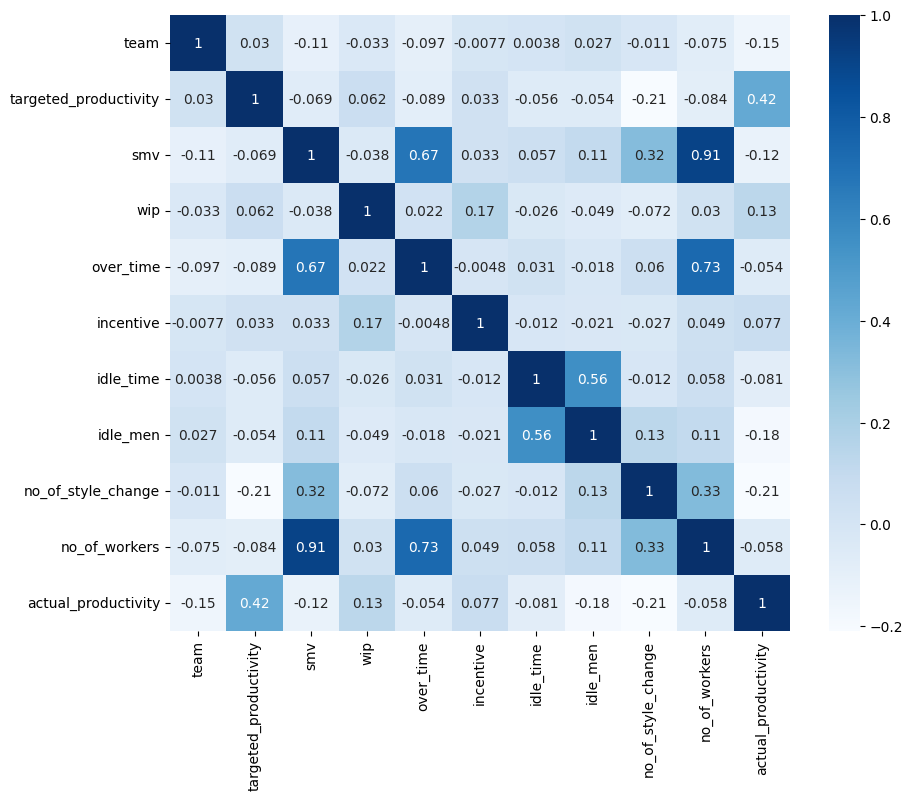

In [5]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)

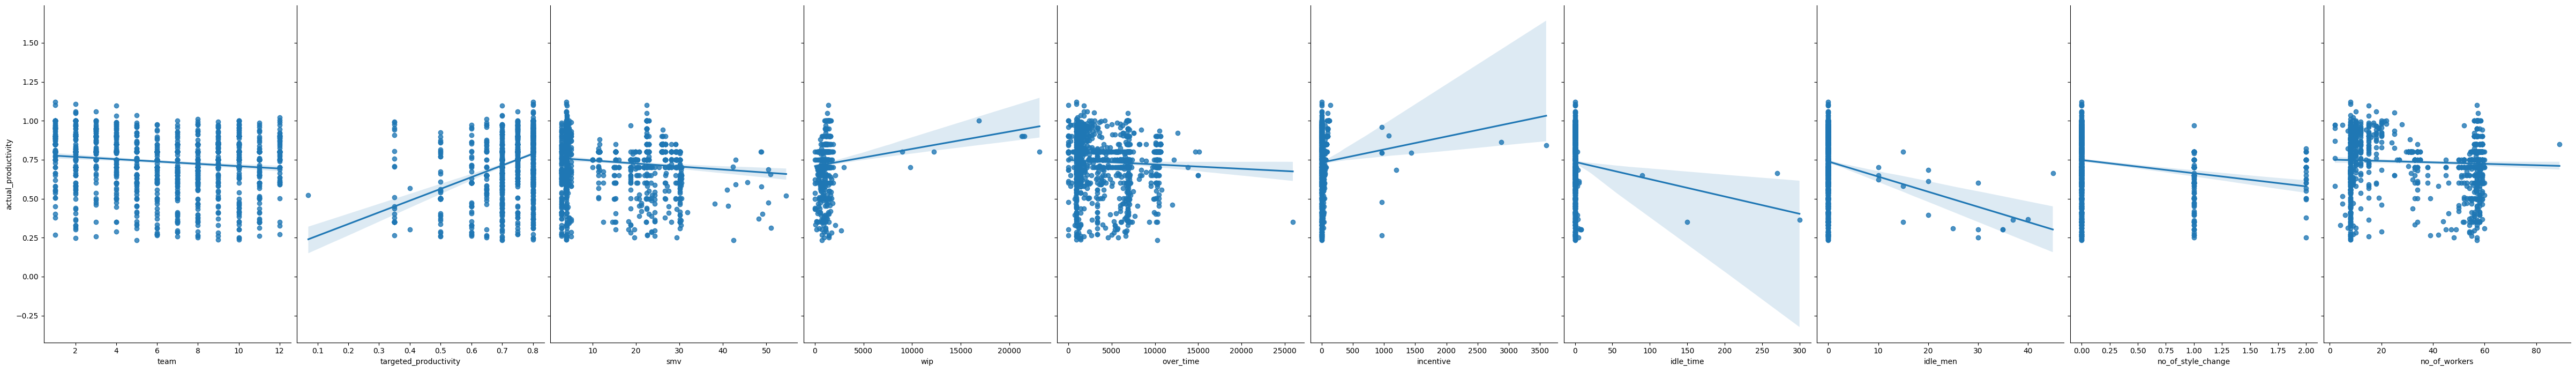

In [9]:
x_vars_numeric = df.select_dtypes(include=[np.number]).drop(['actual_productivity'], axis=1).columns

sns.pairplot(df, x_vars=x_vars_numeric, y_vars='actual_productivity', height=7, aspect=0.7, kind='reg')


In [36]:
X = df_numeric.drop(['actual_productivity'], axis=1)  # Características
y = df_numeric['actual_productivity']  # Variable objetivo

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = RandomForestRegressor(random_state=42)

In [39]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:

y_pred = model.predict(X_test)
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)


In [47]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.09829153926813884
MSE:  0.01825720120443628
RMSE:  0.135119211085753


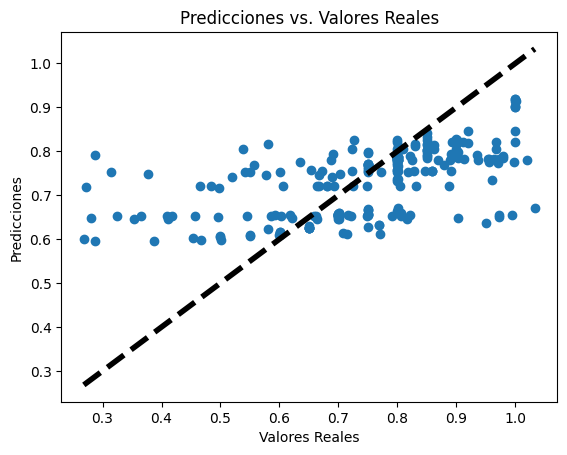

In [41]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()


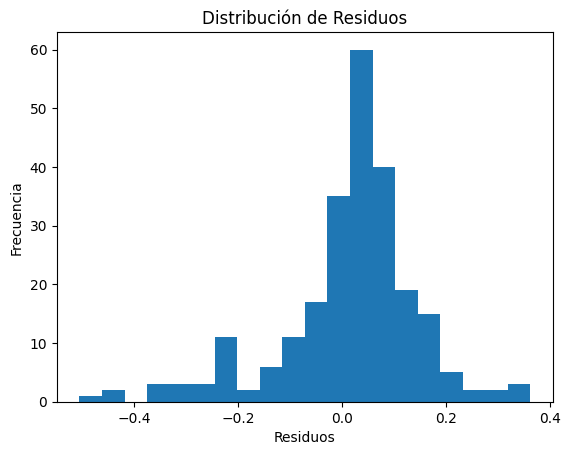

In [42]:
residuos = y_test - y_pred
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.show()


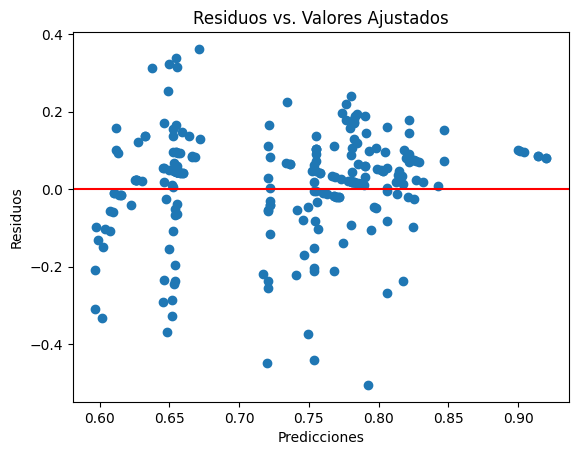

In [43]:
plt.scatter(y_pred, residuos)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Asumiendo que X e y ya están definidos con tus datos
# Inicializar el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Usar validación cruzada para calcular el MSE
scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores a MSE positivos
mse_scores = -scores

print("MSE scores por cada pliegue: ", mse_scores)
print("Promedio MSE: ", np.mean(mse_scores))


MSE scores por cada pliegue:  [0.01436369 0.02722679 0.02455743 0.02731412 0.02139127]
Promedio MSE:  0.022970661020702644


In [52]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[0.1198486  0.16500544 0.15670812 0.16526985 0.14625753]
0.1506179079438612
